# Welcome to my C964 CS Capstone Project!

This application will demonstrate Task2-PartC for the working application of showing machine learning in practice with a dataset from Kaggle. The ML model from sklearn will be using the supervised SVM Classifier learning method that will describe the data with visuals and predict the mortality of persons (male or female) with the disease NAFLD (non-alcoholic fatty liver disease). Below is the dataset’s describe() method values that show all of the relevant data to the study of NAFLD. The overall risks from NAFLD seem to be minimal based off this dataset, but out of the 17,549 participants studied, about 12,562 had sufficient data to study on. The meaning of sufficient data means that all attributes of each participant have a value, about 4,987 participants had insufficient data. This accounts for approximately 28.4% of the study. While this causes a shift in accuracy generated from the model, overall, the results are good considering that much of the population has a fatty liver. This study doesn't mean that diet and exercise should be taken out of a reader's daily routine.

In [87]:
# Library imports
import pandas as pd
import voila as wow
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [88]:
# df is a variable for dataframe used to store the dataframe from the csv table that is imported into the notebook
df = pd.read_csv('nafld1.csv')

In [89]:
# Rename column names to something more relatable
df.rename(columns = {"Unnamed: 0" : "NoName", "id" : "SubjectID", "age" : "Age", "male" : "Sex", "weight" : "Weight_kg", "height" : "Height_cm", "bmi" : "BMI", "case.id" : "CaseID", "futime" : "TimeTracking", "status" : "Alive | Dead"}, inplace=True, errors="raise")

In [90]:
# Drop not useful column and set to new variable
nafld = df.drop(columns = ['NoName'])

In [91]:
# New Dataframe variable is set
nafld.describe()

,SubjectID,Age,Sex,Weight_kg,Height_cm,BMI,CaseID,TimeTracking,Alive | Dead
count,17549.000000,17549.000000,17549.000000,12763.000000,14381.000000,12588.000000,17518.000000,17549.000000,17549.000000
mean,8784.215967,52.659639,0.467320,86.353350,169.434949,30.073865,8840.924478,2410.600547,0.077725
std,5070.970712,14.722515,0.498945,22.239458,10.141421,7.085435,5051.334075,1573.017638,0.267746
min,1.000000,18.000000,0.000000,33.400000,123.000000,9.207332,3.000000,7.000000,0.000000
25%,4393.000000,42.000000,0.000000,70.000000,162.000000,25.136434,4598.000000,1132.000000,0.000000
50%,8786.000000,53.000000,0.000000,83.900000,169.000000,28.875884,8781.000000,2148.000000,0.000000
75%,13175.000000,63.000000,1.000000,99.200000,177.000000,33.710372,13249.000000,3353.000000,0.000000
max,17566.000000,98.000000,1.000000,181.700000,215.000000,84.395725,17563.000000,7268.000000,1.000000


    The table below shows the count of complete data from the dataset. For the purpose of this ML project, data that was missing has been filled in with average values to make up a larger dataset for the model to train on.

In [154]:
# df.describe()
test_df = df.dropna(how = 'any')
test_df.head()
test_df.describe()

,NoName,SubjectID,Age,Sex,Weight_kg,Height_cm,BMI,CaseID,TimeTracking,Alive | Dead
count,12562.000000,12562.000000,12562.000000,12562.000000,12562.000000,12562.000000,12562.000000,12562.000000,12562.000000,12562.00000
mean,8802.447859,8781.562649,53.545057,0.443321,86.413398,169.275275,30.069193,8868.384174,2402.066550,0.08056
std,4963.668412,5072.686940,14.811946,0.496797,22.259994,10.125304,7.086996,5043.694392,1541.805729,0.27217
min,6.000000,1.000000,18.000000,0.000000,33.400000,123.000000,9.207332,3.000000,7.000000,0.00000
25%,4562.750000,4403.750000,44.000000,0.000000,70.000000,162.000000,25.126893,4697.000000,1143.000000,0.00000
50%,8943.500000,8800.500000,53.000000,0.000000,84.000000,169.000000,28.869826,8783.000000,2146.000000,0.00000
75%,12793.250000,13151.750000,64.000000,1.000000,99.300000,177.000000,33.702689,13269.000000,3341.000000,0.00000
max,17565.000000,17566.000000,98.000000,1.000000,181.700000,207.000000,84.395725,17563.000000,7145.000000,1.00000


In [92]:
# Filled missing values with average values
nafld.fillna(nafld.mean(), inplace=True)
# nafld.describe()

,SubjectID,Age,Sex,Weight_kg,Height_cm,BMI,CaseID,TimeTracking,Alive | Dead
count,17549.000000,17549.000000,17549.000000,17549.000000,17549.000000,17549.000000,17549.000000,17549.000000,17549.000000
mean,8784.215967,52.659639,0.467320,86.353350,169.434949,30.073865,8840.924478,2410.600547,0.077725
std,5070.970712,14.722515,0.498945,18.965738,9.180460,6.000865,5046.870302,1573.017638,0.267746
min,1.000000,18.000000,0.000000,33.400000,123.000000,9.207332,3.000000,7.000000,0.000000
25%,4393.000000,42.000000,0.000000,75.400000,164.000000,26.542591,4608.000000,1132.000000,0.000000
50%,8786.000000,53.000000,0.000000,86.353350,169.434949,30.073865,8789.000000,2148.000000,0.000000
75%,13175.000000,63.000000,1.000000,92.700000,175.000000,31.574946,13234.000000,3353.000000,0.000000
max,17566.000000,98.000000,1.000000,181.700000,215.000000,84.395725,17563.000000,7268.000000,1.000000


In [93]:
import ipywidgets as widgets

    Columns TimeTracking and CaseID were dropped (removed) since they don't have any significant impact on the ML model.

In [94]:
# Drop other useless columns for the project
nafld.drop(columns=['TimeTracking', 'CaseID'], inplace=True)
nafld.describe()

,SubjectID,Age,Sex,Weight_kg,Height_cm,BMI,Alive | Dead
count,17549.000000,17549.000000,17549.000000,17549.000000,17549.000000,17549.000000,17549.000000
mean,8784.215967,52.659639,0.467320,86.353350,169.434949,30.073865,0.077725
std,5070.970712,14.722515,0.498945,18.965738,9.180460,6.000865,0.267746
min,1.000000,18.000000,0.000000,33.400000,123.000000,9.207332,0.000000
25%,4393.000000,42.000000,0.000000,75.400000,164.000000,26.542591,0.000000
50%,8786.000000,53.000000,0.000000,86.353350,169.434949,30.073865,0.000000
75%,13175.000000,63.000000,1.000000,92.700000,175.000000,31.574946,0.000000
max,17566.000000,98.000000,1.000000,181.700000,215.000000,84.395725,1.000000


    A correlogram is shown below to demonstrate the many comparisons of data attributes to each other.

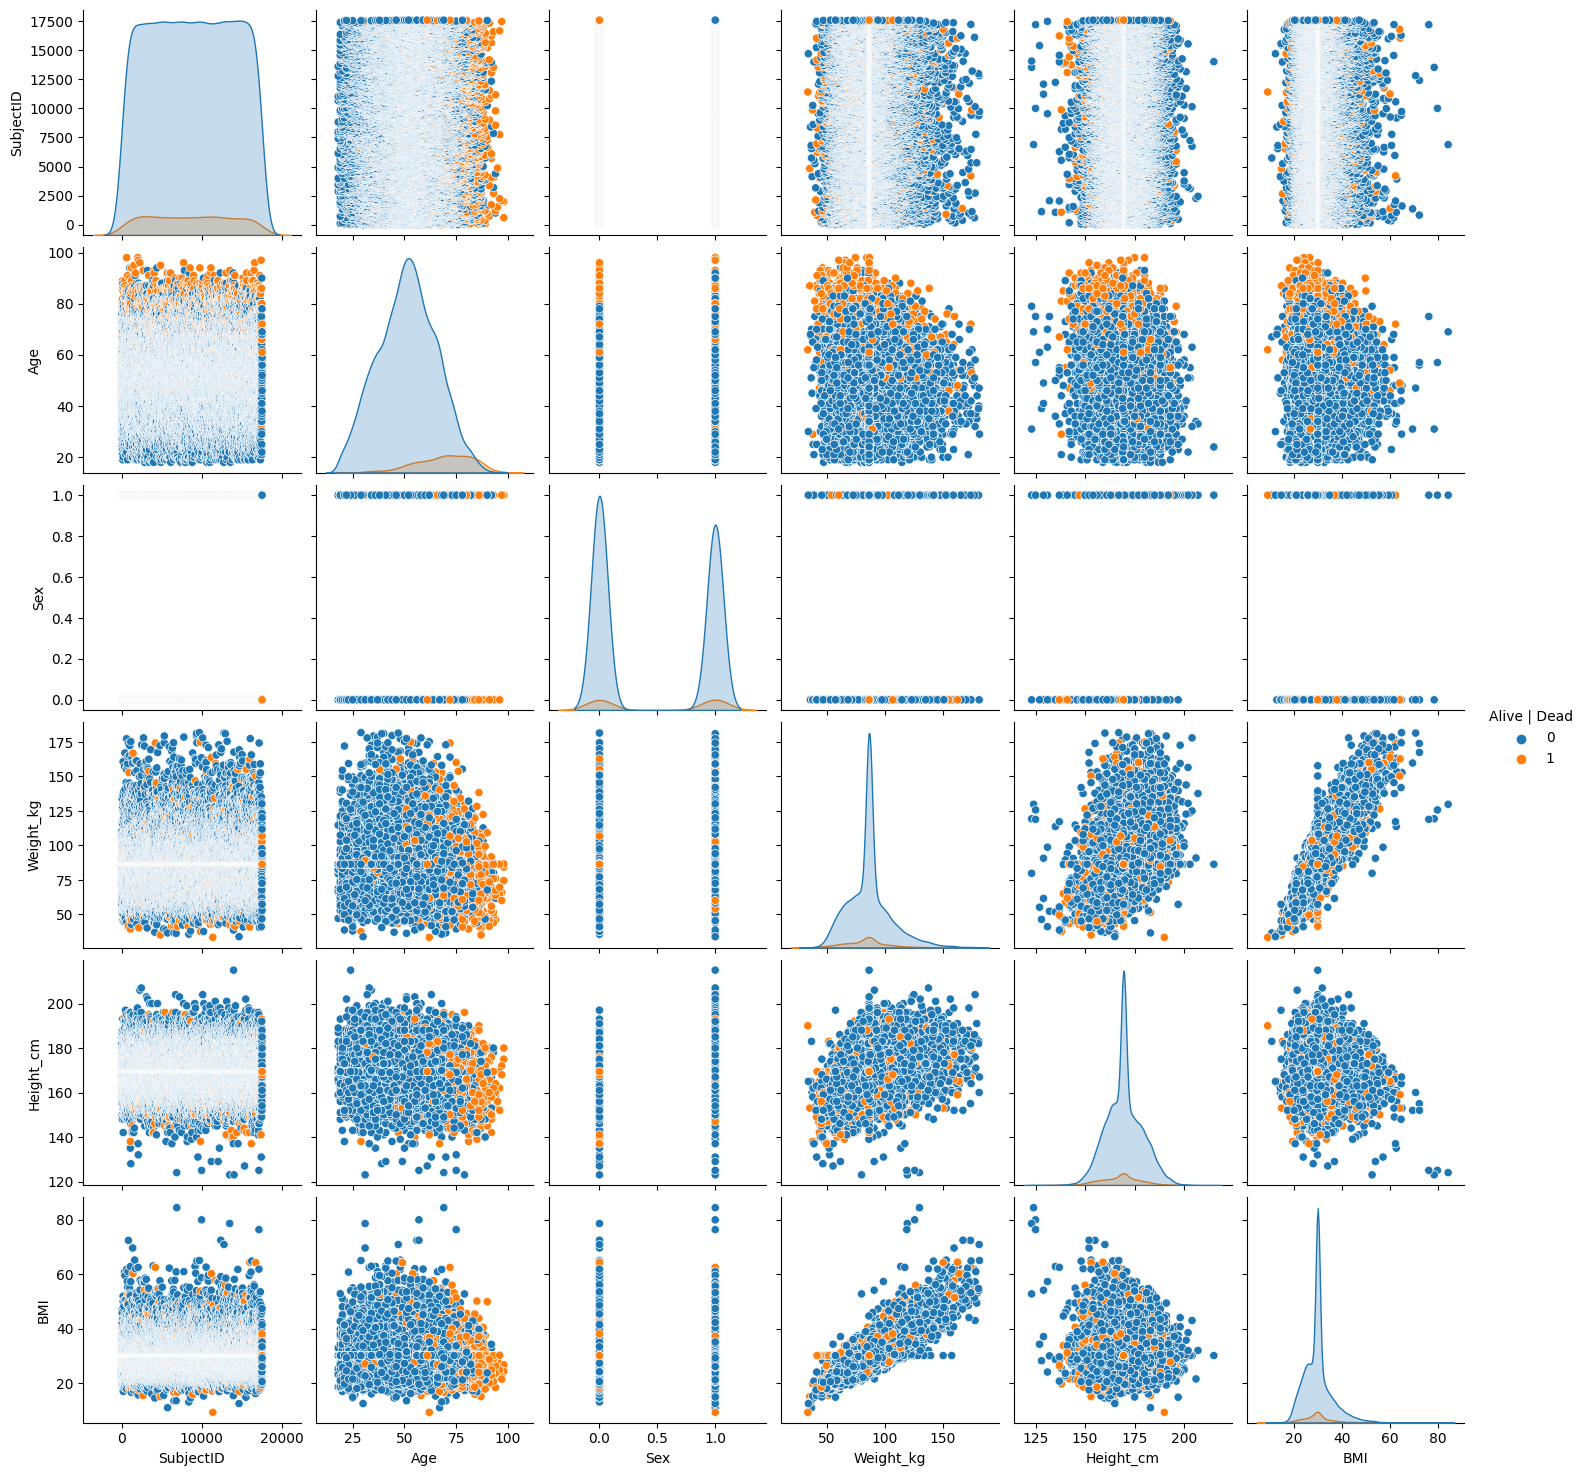

In [95]:
# Data is cleaned up and preprocessed, now time to plot data in visualizations and analyze
# correlogram Alive is 0 and Dead is 1
sns.pairplot(nafld, hue='Alive | Dead')
plt.show()

    A histogram is shown to show any correlations between BMI and Age of the participants. It looks like as age increases,  regardless of BMI, the chance of dying increases. (this is obvious) However, there seems to be an outlier around the BMI level of 30, an unusual amount of deaths from the mid-20's through almost 100 years old. This outlier is indicated by the orange line shown in the histogram above for an average BMI of 30.

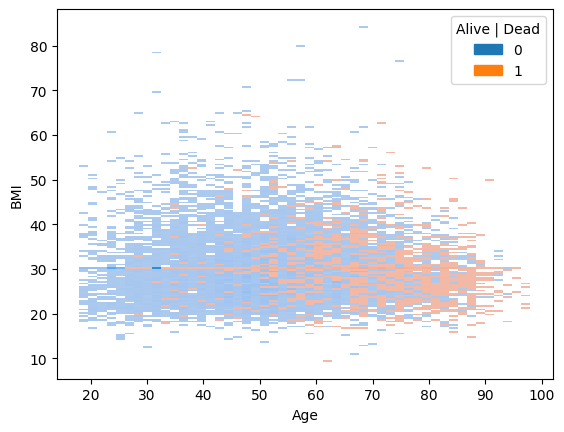

In [96]:
# Compare BMI and Age with mortality
sns.histplot(nafld, x="Age", y="BMI", hue="Alive | Dead")
plt.show()

    A scatterplot is shown to illustrate the difference in how the same data being displayed in one visualization can be different from another. You will notice that the outlier from above is no longer there.

[]

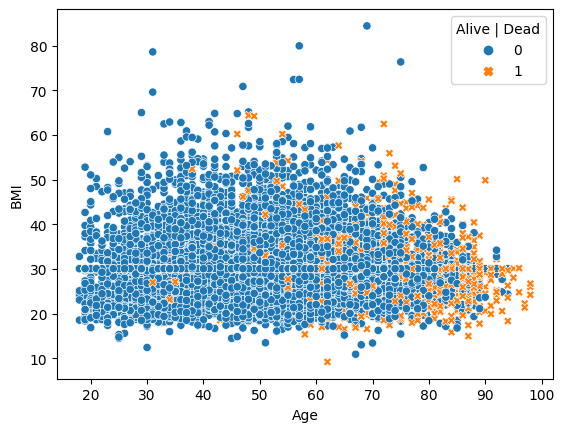

In [97]:
# A Scatterplot is shown below
sns.scatterplot(data=nafld, x="Age", y="BMI", hue="Alive | Dead", style="Alive | Dead")
plt.plot()

    After reviewing the scatterplot, the data shows up clearer than the histogram plot shown above the current Scatterplot shown. There seems to be no outlier shown in this representation of that dataset. A cow says scatterplots are cool!

In [98]:
!cowsay "Scatterplots are cool!"

  ______________________
| Scatterplots are cool! |
                      \
                       \
                         ^__^
                         (oo)\_______
                         (__)\       )\/\
                             ||----w |
                             ||     ||


    Using machine learning algorithms from skLearn libraries, we can predict the mortality of a person based on various attributes from the dataset being used. An accuracy score of approximately 92% is shown from the ML model below.

In [128]:
# Prediction ML model with prediction of mortality based on a subject's Age, Sex, Weight, Height, and BMI, 
# then compared to mortality data as the dependent variable. Accuracy analysis of prediction model completed.
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import datasets

# Sets variables to dataset columns to compare and test

X = nafld.drop(columns = ['SubjectID', 'Alive | Dead'])
y = nafld.drop(columns = ['SubjectID', 'Age', 'Sex', 'Weight_kg', 'Height_cm', 'BMI'])

# Creates training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

# print(X_test.head())
# print(X_test.shape)
# print("\n")
# print(y_test.head())
# print(y_test.shape)

# Convert from dataframe to array to prevent error 'y' data as a 1d array error
y_train_array, y_test_array = y_train['Alive | Dead'].values, y_test['Alive | Dead'].values
y_train_array

X_train_array, X_test_array = X_train.values, X_test.values
X_train_array

# Feature Scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Training a SVM classifier using SVC class
svm = SVC(kernel = 'linear', random_state=33, C = 0.1)
svm.fit(X_train_array, y_train_array)

# Prediction output test
predictions = svm.predict(X_train_array)
np.set_printoptions(threshold=20)
print(predictions)

# Mode performance
y_pred = svm.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

[0 0 0 ... 0 0 0]
Accuracy: 0.922


    Following the prediction model, the variable can be explored by the reader using sliders to test other outcomes of data.

In [158]:
#The sliders where the user can input values. Min and max are set by using the complete datasets' 
style = {'description_width': 'initial'}
age_widget = widgets.FloatSlider(description='Age:',min=18.0, max=98.0)
sex_widget = widgets.Dropdown(options=[('Male', 0), ('Female', 1)], description='Sex:', disabled=False)
weight_widget = widgets.FloatSlider(description='Weight (in kg):', style=style, min=30.0, max=185.0)
height_widget = widgets.FloatSlider(description='Height (in cm):', style=style, min=120.0, max=220.0)
bmi_widget = widgets.FloatSlider(description='BMI:', min=9.0, max=85.0)

#A button for the user to get predictions using input valus. 
button_predict = widgets.Button( description='Predict' )
button_ouput = widgets.Label(value='Enter values and press the \"Predict\" button.' )

#Defines what happens when you click the button 
def on_click_predict(b):
    prediciton = svm.predict([[
        age_widget.value, sex_widget.value, weight_widget.value, height_widget.value, bmi_widget.value]])
    button_ouput.value='Prediction = ' + str(prediciton[0])
button_predict.on_click(on_click_predict)

#Displays the text boxes and button inside a VBox 
vb=widgets.VBox([age_widget, sex_widget, weight_widget, height_widget, bmi_widget, button_predict,button_ouput])
print('\033[1m' + 'Select parameter values and make a prediction:' + '\033[0m')
display(vb)

Select parameter values and make a prediction:
